# Single Neuron Logistic Regression

In this notebook, we revisit machine learning classification problems. More specifically, we consider the *probabilistic binary classfication problem*. We model this problem as a single neuron model with the *binary cross entropy loss function*. As with single neuron linear regression, we will train our neuron with stochastic gradient descent based on the * **Shill Bidding Dataset** *.


For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the ```SingleNeuron``` class defined in * **Lecture 5.1 Single Neuron Logistic Regression** *.


## Coding

---

In the chunk below, we firstly define ```SingleNeuron``` class. Then define the ```sigmoid activation function``` and ```cross entropy loss function```.

In [1]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

# Define sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Define cross entropy loss function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

### Conduct linear regression model and check the loss performance.
Instead of creating a single neuron model for predicting a class deterministic label, we will build a single neuron model that predicts a *class probability*.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
df.iloc[:,3:].describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


According to the result in the above chunk, all variables are between 0 and 1, except the 'Auction_Duration'.

In this notebook for linear regression, we only focus on the relationship between class (response variable) and the auction features of a shill bidder. Once we have our feature vector and target vector we can then pass these values into the ```SingleNeuron.train()``` method to train our logistic single neuron with stochastic gradient descent. All of this can be done by running the following code in the cell below.

In [5]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
y = df.Class

# Create training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X_train.values, y_train, alpha = 0.01, epochs = 50)

Now that we have trained the variable ```node```, we can now visualize the binary cross entropy loss over each epoch by plotting the values in the ```SingleNeuron.errors_``` attribute. This can be done by running the following code in the cell below.

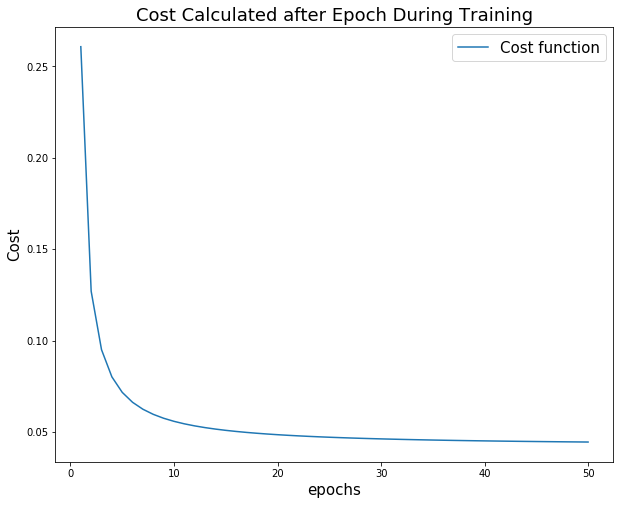

In [7]:
node.plot_cost_function()
plt.show()

This looks good. Visualizing the cost function over the epochs during training helps us verify that are neuron is indeed learning over time. We can next visualize our hypthesis function, or prediction function (recall in all supervised machine learning we are learning a function $h$ which approximates the true target function $f$ ), by plotting the ```SingleNeuron.predict()``` method over the scattered data points in question. This can be done by running the following code in the cell below.

In [38]:
node.predict(X_train)

array([0.55723639, 0.129669  , 0.129669  , ..., 0.0272824 , 0.04269774,
       0.0272824 ])

In [39]:
np.rint(node.predict(X_train)) != y

array([ True, False, False, ..., False, False, False])

In [8]:
classification_error = (np.rint(node.predict(X_train)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.026894478721721248


This is a great classification error on our training data! We can now view our decision boundary implied by the trained weights and bias by running the following code in the cell below.

### check the classify erro on the test dataset.

cf_matrix = [[1684   23]
 [  30  160]] 



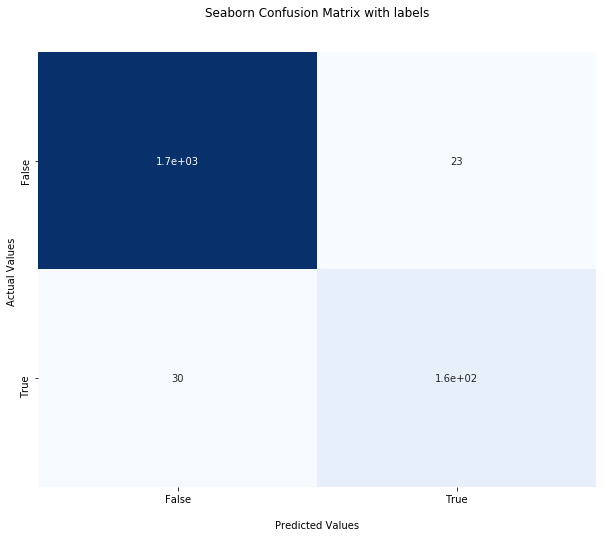

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1707
          1       0.87      0.84      0.86       190

avg / total       0.97      0.97      0.97      1897



In [9]:
# Make predictions on testing data
y_pred = np.rint(node.predict(X_test))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

## Conclusion

---

From the result above, we can see that the logistic regression single neuron model performs well on the Shill Bidding Dataset for a low classfiy error.